In [1]:
import pandas as pd
import pyarrow
import seaborn as sns

In [2]:
df = pd.read_csv("transform_duck/data/arquivos_csv/daily_sales_retail_0.csv")

In [3]:
df.head()

,transaction_id,transaction_time,ean,product_name,price,store,pos_number,pos_system,pos_version,pos_last_maintenance,operator
0,6ebb0e05-476b-4f9d-a717-48934abb1296,2024-01-22 17:59:55,4883867239549,Pattern,34.24,0,6,Windows,2.0,2023-10-15 00:52:24.150203,39
1,6ebb0e05-476b-4f9d-a717-48934abb1296,2024-01-22 17:59:55,4883867239549,Pattern,34.24,0,6,Windows,2.0,2023-10-15 00:52:24.150203,39
2,6ebb0e05-476b-4f9d-a717-48934abb1296,2024-01-22 17:59:55,4883867239549,Pattern,34.24,0,6,Windows,2.0,2023-10-15 00:52:24.150203,39
3,6ebb0e05-476b-4f9d-a717-48934abb1296,2024-01-22 17:59:55,4883867239549,Pattern,34.24,0,6,Windows,2.0,2023-10-15 00:52:24.150203,39
4,6ebb0e05-476b-4f9d-a717-48934abb1296,2024-01-22 17:59:55,4883867239549,Pattern,34.24,0,6,Windows,2.0,2023-10-15 00:52:24.150203,39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138663 entries, 0 to 1138662
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1138663 non-null  object 
 1   transaction_time      1138663 non-null  object 
 2   ean                   1138663 non-null  int64  
 3   product_name          1138663 non-null  object 
 4   price                 1138663 non-null  float64
 5   store                 1138663 non-null  int64  
 6   pos_number            1138663 non-null  int64  
 7   pos_system            1138663 non-null  object 
 8   pos_version           1138663 non-null  float64
 9   pos_last_maintenance  1138663 non-null  object 
 10  operator              1138663 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 95.6+ MB


In [5]:
print('Number of unique values for each column')
for i in df.columns:
    print(i,"----" ,df[i].nunique())

Number of unique values for each column
transaction_id ---- 3993
transaction_time ---- 3970
ean ---- 200
product_name ---- 184
price ---- 1758
store ---- 1
pos_number ---- 20
pos_system ---- 1
pos_version ---- 1
pos_last_maintenance ---- 10
operator ---- 60


In [6]:
len(df)

1138663

In [8]:
df_transacoes = pd.read_parquet("transform_duck/database/df_transactions.parquet")

In [9]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576534 entries, 0 to 14576533
Data columns (total 4 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_time  datetime64[ns]
 1   product_name      object        
 2   price             float64       
 3   store             int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 444.8+ MB


In [10]:
print('Number of unique values for each column')
for i in df_transacoes.columns:
    print(i,"----" ,df_transacoes[i].nunique())

Number of unique values for each column
transaction_time ---- 46738
product_name ---- 184
price ---- 15378
store ---- 14


In [11]:
len(df_transacoes)

14576534

In [12]:
df_transacoes['transaction_time']

0          2024-01-22 17:59:55
1          2024-01-22 17:59:55
2          2024-01-22 17:59:55
3          2024-01-22 17:59:55
4          2024-01-22 17:59:55
                   ...        
14576529   2024-01-13 09:01:52
14576530   2024-01-13 09:01:52
14576531   2024-01-13 09:01:52
14576532   2024-01-13 09:01:52
14576533   2024-01-13 09:01:52
Name: transaction_time, Length: 14576534, dtype: datetime64[ns]

In [13]:
df_transacoes['transaction_time'].dt.year.unique()

array([2024], dtype=int64)

In [14]:
df_transacoes.isnull().sum()

transaction_time    0
product_name        0
price               0
store               0
dtype: int64

In [15]:
df_transacoes.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14576534.0,82.081425,67.172953,0.01,24.57,65.43,128.16,296.79
store,14576534.0,6.247528,4.218119,0.00,3.00,6.00,9.00,14.00


In [16]:
df_sum_price_per_store = df_transacoes.groupby('store')[['store','price']].sum()

<AxesSubplot: xlabel='store', ylabel='price'>

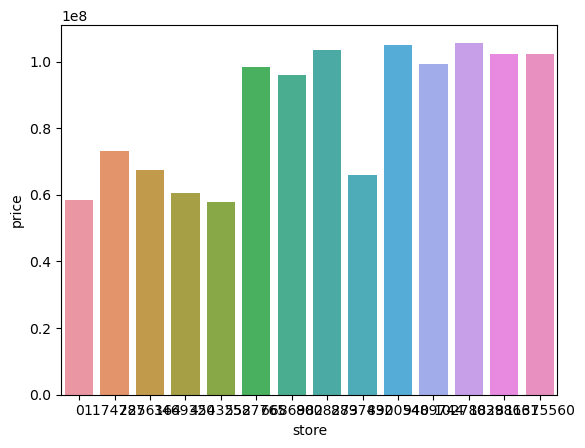

In [17]:
sns.barplot(df_sum_price_per_store,x='store',y='price')

In [18]:
sum_prices = df_transacoes[['store','price']].groupby('store').sum().sort_values(by='price',ascending=False)[:3]

In [19]:
sum_prices.sort_values(by='price',ascending=False)[:3]

,price
store,
9,1.056798e+08
11,1.049658e+08
7,1.036214e+08


In [20]:
df_transacoes['transaction_time'].dt.day.unique()

array([22, 21, 20, 19, 18, 17, 16, 15, 14, 13], dtype=int64)

In [21]:
df_transacoes[(df_transacoes['transaction_time']>pd.to_datetime('2024-01-13')) & (df_transacoes['transaction_time']<pd.to_datetime('2024-01-15'))][['store','price']].groupby('store').sum().sort_values(by='price',ascending=False)[:3]

,price
store,
1,27060533.00
5,24471359.49
9,21719775.03


In [22]:
df_transacoes['day'] = df_transacoes['transaction_time'].dt.day

In [23]:
df_transacoes[['store','price','day']][df_transacoes['store']==0].groupby(by=['day'],axis=0).sum()

,store,price
day,,
13,0,363357.44
14,0,5631528.11
15,0,16994724.87
16,0,511490.71
17,0,982187.64
18,0,3556631.37
19,0,10319474.03
20,0,12172647.53
21,0,2910367.93


<AxesSubplot: xlabel='day', ylabel='price'>

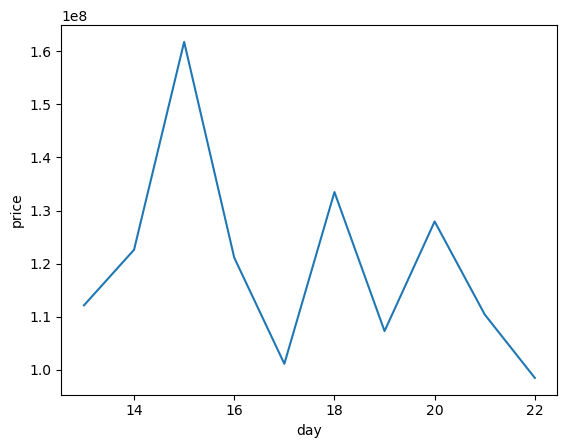

In [26]:
sns.lineplot(df_transacoes.groupby('day')['price'].sum())

In [4]:
df2 = pd.read_parquet('transform_duck/db/df_sales_retail.parquet')

In [5]:
df2.head()

,transaction_time,product_name,price,store
0,2024-01-22 17:59:55,Pattern,34.24,0
1,2024-01-22 17:59:55,Pattern,34.24,0
2,2024-01-22 17:59:55,Pattern,34.24,0
3,2024-01-22 17:59:55,Pattern,34.24,0
4,2024-01-22 17:59:55,Pattern,34.24,0


In [6]:
df2['store'].unique()

array([ 0,  1, 11, 12, 13, 14,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [7]:
len(df2)

13448452

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13448452 entries, 0 to 13448451
Data columns (total 4 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_time  datetime64[ns]
 1   product_name      object        
 2   price             float64       
 3   store             int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 410.4+ MB


In [7]:
df = pd.read_parquet('transform_duck/db/liquor_sales.parquet')

In [4]:
len(df)

19666763

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666763 entries, 0 to 19666762
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Invoice/Item Number  object 
 1   Date                 object 
 2   Store_Number         int32  
 3   Store_Name           object 
 4   Address              object 
 5   City                 object 
 6   Zip_Code             object 
 7   Store_Location       object 
 8   County_Number        float64
 9   County               object 
dtypes: float64(1), int32(1), object(8)
memory usage: 1.4+ GB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666763 entries, 0 to 19666762
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Invoice/Item Number  object 
 1   Date                 object 
 2   Store_Number         int32  
 3   Store_Name           object 
 4   Address              object 
 5   City                 object 
 6   Zip_Code             object 
 7   Store_Location       object 
 8   County_Number        float64
 9   County               object 
dtypes: float64(1), int32(1), object(8)
memory usage: 1.4+ GB
